<a href="https://colab.research.google.com/gist/IvanAPon/4b6a0bfe6578572a76acddfed2adc03b/untitled6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vizro

  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669691 sha256=552b459a6332cff6f9276c7f684d6cf2fd052059f107e5a8fb94a9ca4acc54d3
  Stored in directory: /root/.cache/pip/wheels/75/14/1b/208d09d5e239391048bdc167759977b41ba65a3d4063aebf6b
Successfully built dash-daq
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.16.1 which is incompatible.


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/колеса/'
if not os.path.exists(PATH):
    os.makedirs(PATH)
file_names = [f for f in os.listdir(PATH) if os.path.isfile(os.path.join(PATH, f))]
print(file_names)

Mounted at /content/drive
['Dataframe_01.csv', 'Dataframe_02.csv', 'Dataframe_03.csv', 'Dataframe_1_01.csv', 'Dataframe_2_01.csv']


In [ ]:
# Грузим
url = "https://docs.google.com/spreadsheets/d/13nMLoI6eN5NnZKLVkglSlwlEAlENLiZL/export?format=csv&gid=1496677"
df = pd.read_csv(url)
print(df.head())
print(df.shape)

   Column1  #тип  Номер  Секция   Год    TOTAL  TOTAL_1 TOTAL_2 TOTAL_3  \
0        0   253      1       1  2022  158 343  103 320  14 237  27 595   
1        1   253      1       2  2022  158 343  103 320  14 237  27 595   
2        2   253      1       3  2022  158 343  103 320  14 237  27 595   
3        3   253      2       1  2022  153 480   99 362  15 819  24 543   
4        4   253      2       2  2022  153 480   99 362  15 819  24 543   

  TOTAL_4  ...  Ю-УР_1  Ю-УР_2  Ю-УР_3  Ю-УР_4 Кол-во пар Пробег, км  \
0  13 191  ...       0       0       0       0          4    570 284   
1  13 191  ...       0       0       0       0          4    489 147   
2  13 191  ...       0       0       0       0          4    460 390   
3  13 756  ...       0       0       0       0          4    532 528   
4  13 756  ...       0       0       0       0          4    532 528   

  Износ, мм Период, дн Износ мм/10000км Unnamed: 83  
0     22,80      1 092             0,40         NaN  
1     18

In [ ]:
# Превращаем все в цифры
columns_to_process = df.columns.tolist()

# Превращаем все в цифры с использованием простого if
for column in df.columns:
    #print(column,'=',df[column].dtype)

    if df[column].dtype == 'object':
        df[column] = df[column].str.replace('\xa0', '').str.replace(',', '.').replace(' ', '').replace('#DIV/0!', 0).astype(float)

print(df.head())


   Column1  #тип  Номер  Секция   Год     TOTAL   TOTAL_1  TOTAL_2  TOTAL_3  \
0        0   253      1       1  2022  158343.0  103320.0  14237.0  27595.0   
1        1   253      1       2  2022  158343.0  103320.0  14237.0  27595.0   
2        2   253      1       3  2022  158343.0  103320.0  14237.0  27595.0   
3        3   253      2       1  2022  153480.0   99362.0  15819.0  24543.0   
4        4   253      2       2  2022  153480.0   99362.0  15819.0  24543.0   

   TOTAL_4  ...  Ю-УР_1  Ю-УР_2  Ю-УР_3  Ю-УР_4  Кол-во пар  Пробег, км  \
0  13191.0  ...     0.0     0.0     0.0     0.0           4    570284.0   
1  13191.0  ...     0.0     0.0     0.0     0.0           4    489147.0   
2  13191.0  ...     0.0     0.0     0.0     0.0           4    460390.0   
3  13756.0  ...     0.0     0.0     0.0     0.0           4    532528.0   
4  13756.0  ...     0.0     0.0     0.0     0.0           4    532528.0   

   Износ, мм  Период, дн  Износ мм/10000км  Unnamed: 83  
0      22.80    

In [ ]:
# Удаление строк, где в колонке "Износ, мм" стоит 0 это явная лажа
df = df[df["Износ, мм"] != 0]
#Удаляем суммареые колонки
columns_to_drop = ['Год', 'Column1', 'TOTAL', 'TOTAL_1', 'TOTAL_2', 'TOTAL_3', 'TOTAL_4',
                   'RES_1', 'RES_2', 'RES_3', 'RES_4',  'Износ мм/10000км', 'Unnamed: 83']

df = df.drop(columns=columns_to_drop)
print(df.shape)
#print(df.head())


(5039, 71)


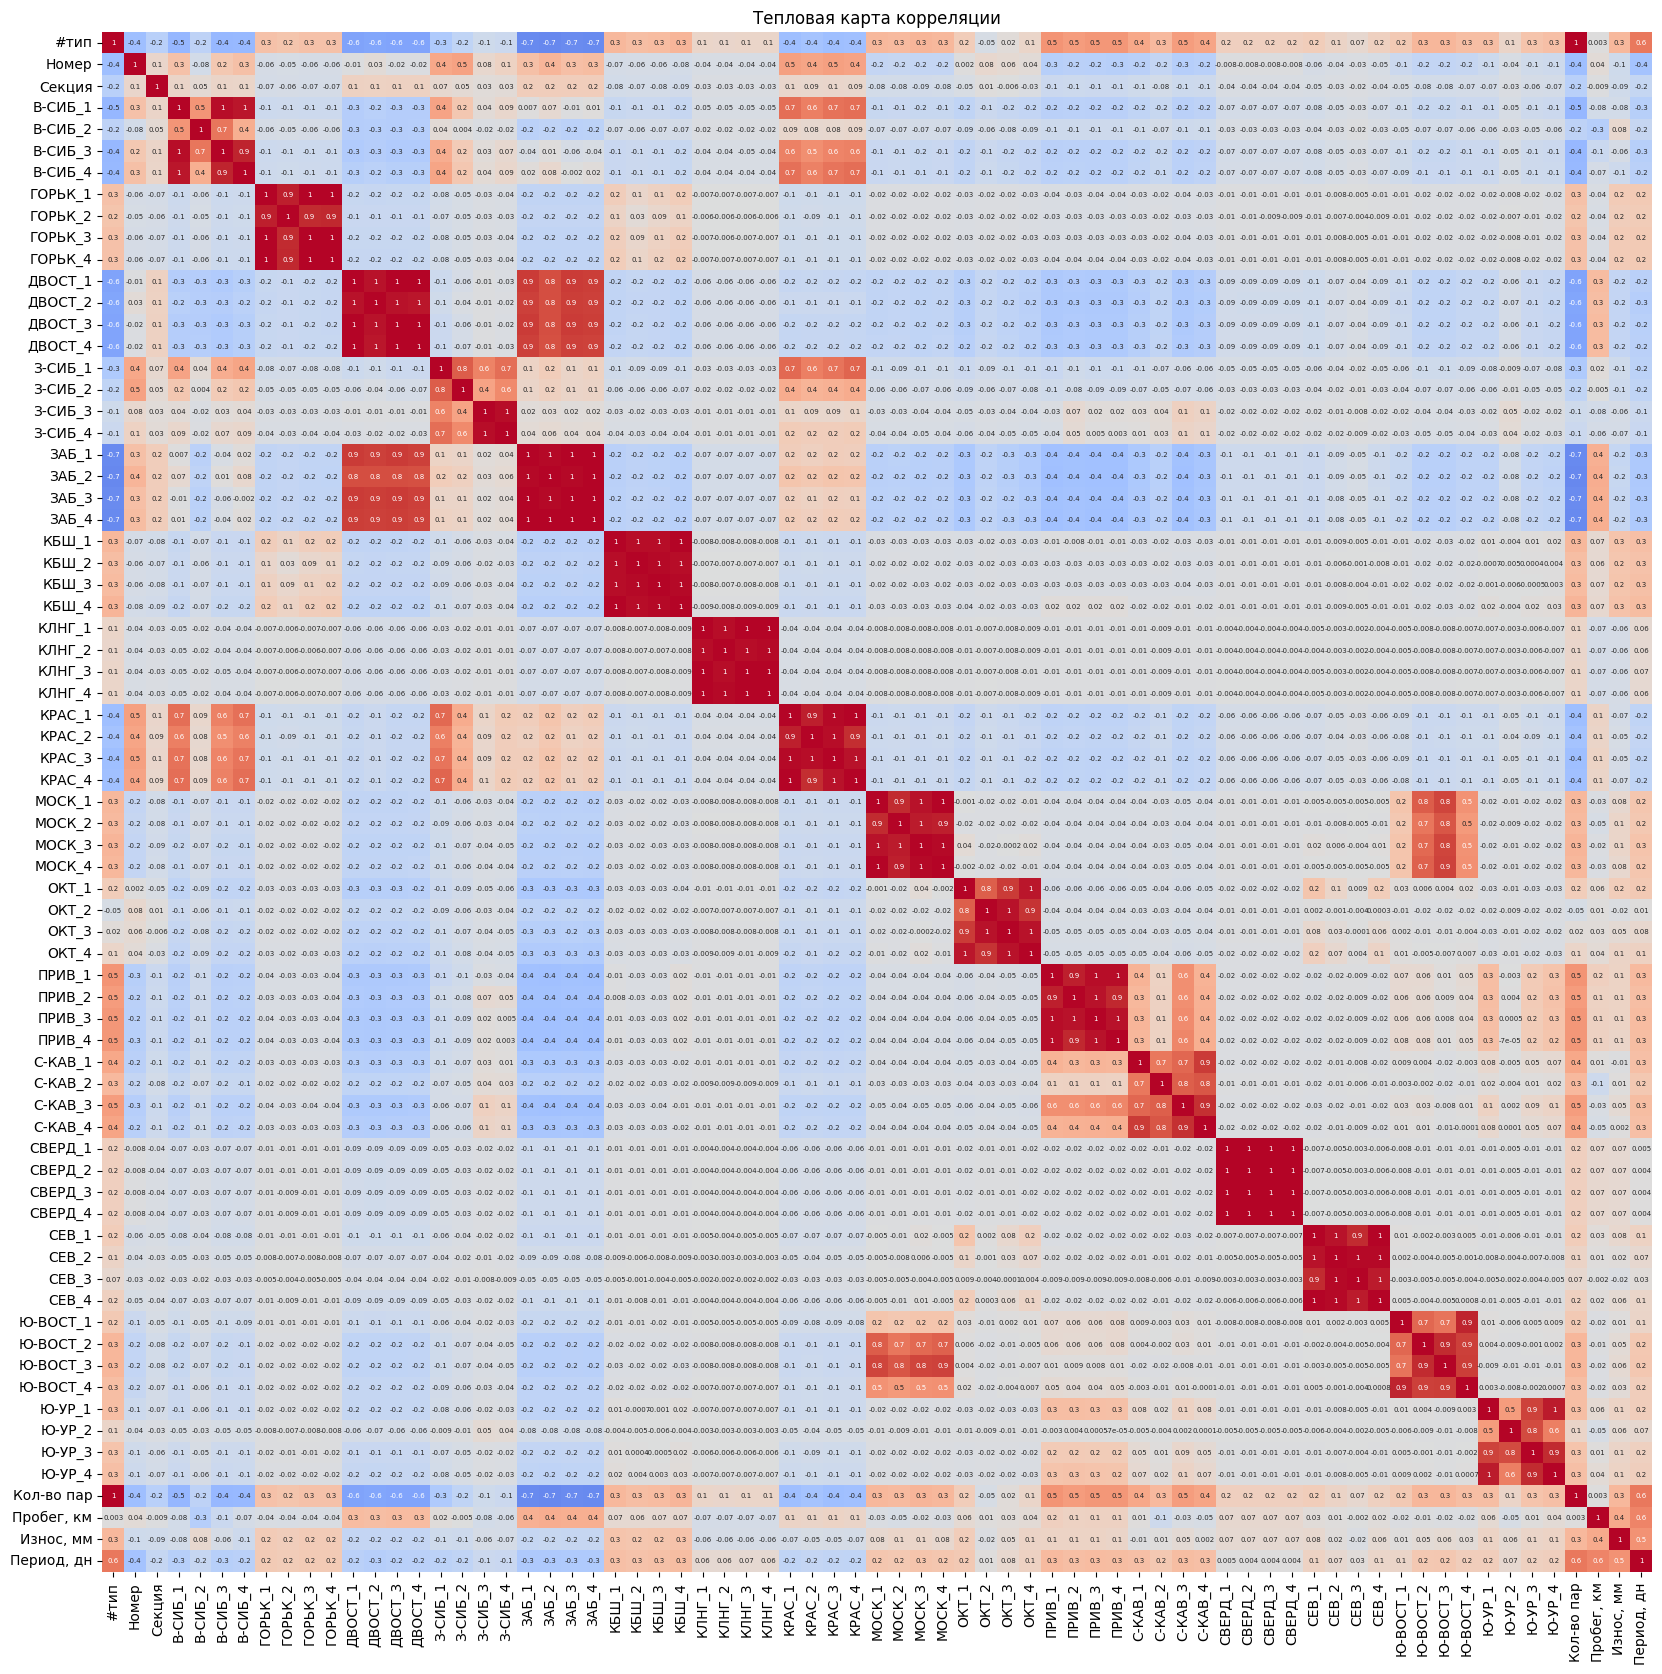

In [ ]:

correlation_matrix = df.corr(numeric_only=True)
'''
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title("Тепловая карта корреляции")
plt.show()
'''
'''
z=correlation_matrix
heatmap = ff.create_annotated_heatmap(z.values, x=list(z.columns), y=list(z.index), colorscale='Viridis')
heatmap.layout.title = 'Тепловая карта корреляции'

heatmap.show()
'''

plt.figure(figsize=(20, 20))  # Установите нужный размер графика
sns.heatmap(correlation_matrix, annot=True,annot_kws={'fontsize':5}, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, fmt='.1g')
plt.title("Тепловая карта корреляции")
plt.show()


In [ ]:
df.to_csv(PATH+'Dataframe_01.csv', index=False)

In [13]:
df = pd.read_csv(PATH+'Dataframe_01.csv')

In [14]:
columns_to_sum = [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

df['Сумма пробега'] = df[columns_to_sum].sum(axis=1)
df['Износ на пробег'] = df['Износ, мм'] / df['Сумма пробега']*10000
print(df.head())

df.to_csv(PATH+'Dataframe_02.csv', index=False)

   #тип  Номер  Секция  В-СИБ_1  В-СИБ_2  В-СИБ_3  В-СИБ_4  ГОРЬК_1  ГОРЬК_2  \
0   253      1       1      0.0      0.0      0.0      0.0      0.0      0.0   
1   253      1       2      0.0      0.0      0.0      0.0      0.0      0.0   
2   253      1       3      0.0      0.0      0.0      0.0      0.0      0.0   
3   253      2       1  69503.0  10839.0  16698.0   9392.0      0.0      0.0   
4   253      2       2  69503.0  10839.0  16698.0   9392.0      0.0      0.0   

   ГОРЬК_3  ...  Ю-УР_1  Ю-УР_2  Ю-УР_3  Ю-УР_4  Кол-во пар  Пробег, км  \
0      0.0  ...     0.0     0.0     0.0     0.0           4    570284.0   
1      0.0  ...     0.0     0.0     0.0     0.0           4    489147.0   
2      0.0  ...     0.0     0.0     0.0     0.0           4    460390.0   
3      0.0  ...     0.0     0.0     0.0     0.0           4    532528.0   
4      0.0  ...     0.0     0.0     0.0     0.0           4    532528.0   

   Износ, мм  Период, дн  Сумма пробега  Износ на пробег  
0      22

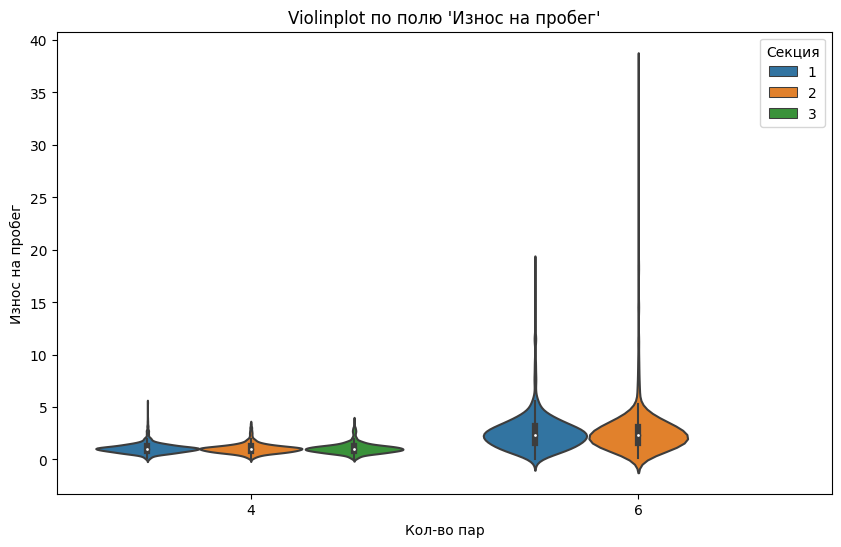

In [15]:
df = pd.read_csv(PATH+'Dataframe_02.csv')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Кол-во пар', y='Износ на пробег', hue='Секция', data=df, split=False)
plt.title("Violinplot по полю 'Износ на пробег'")
plt.show()

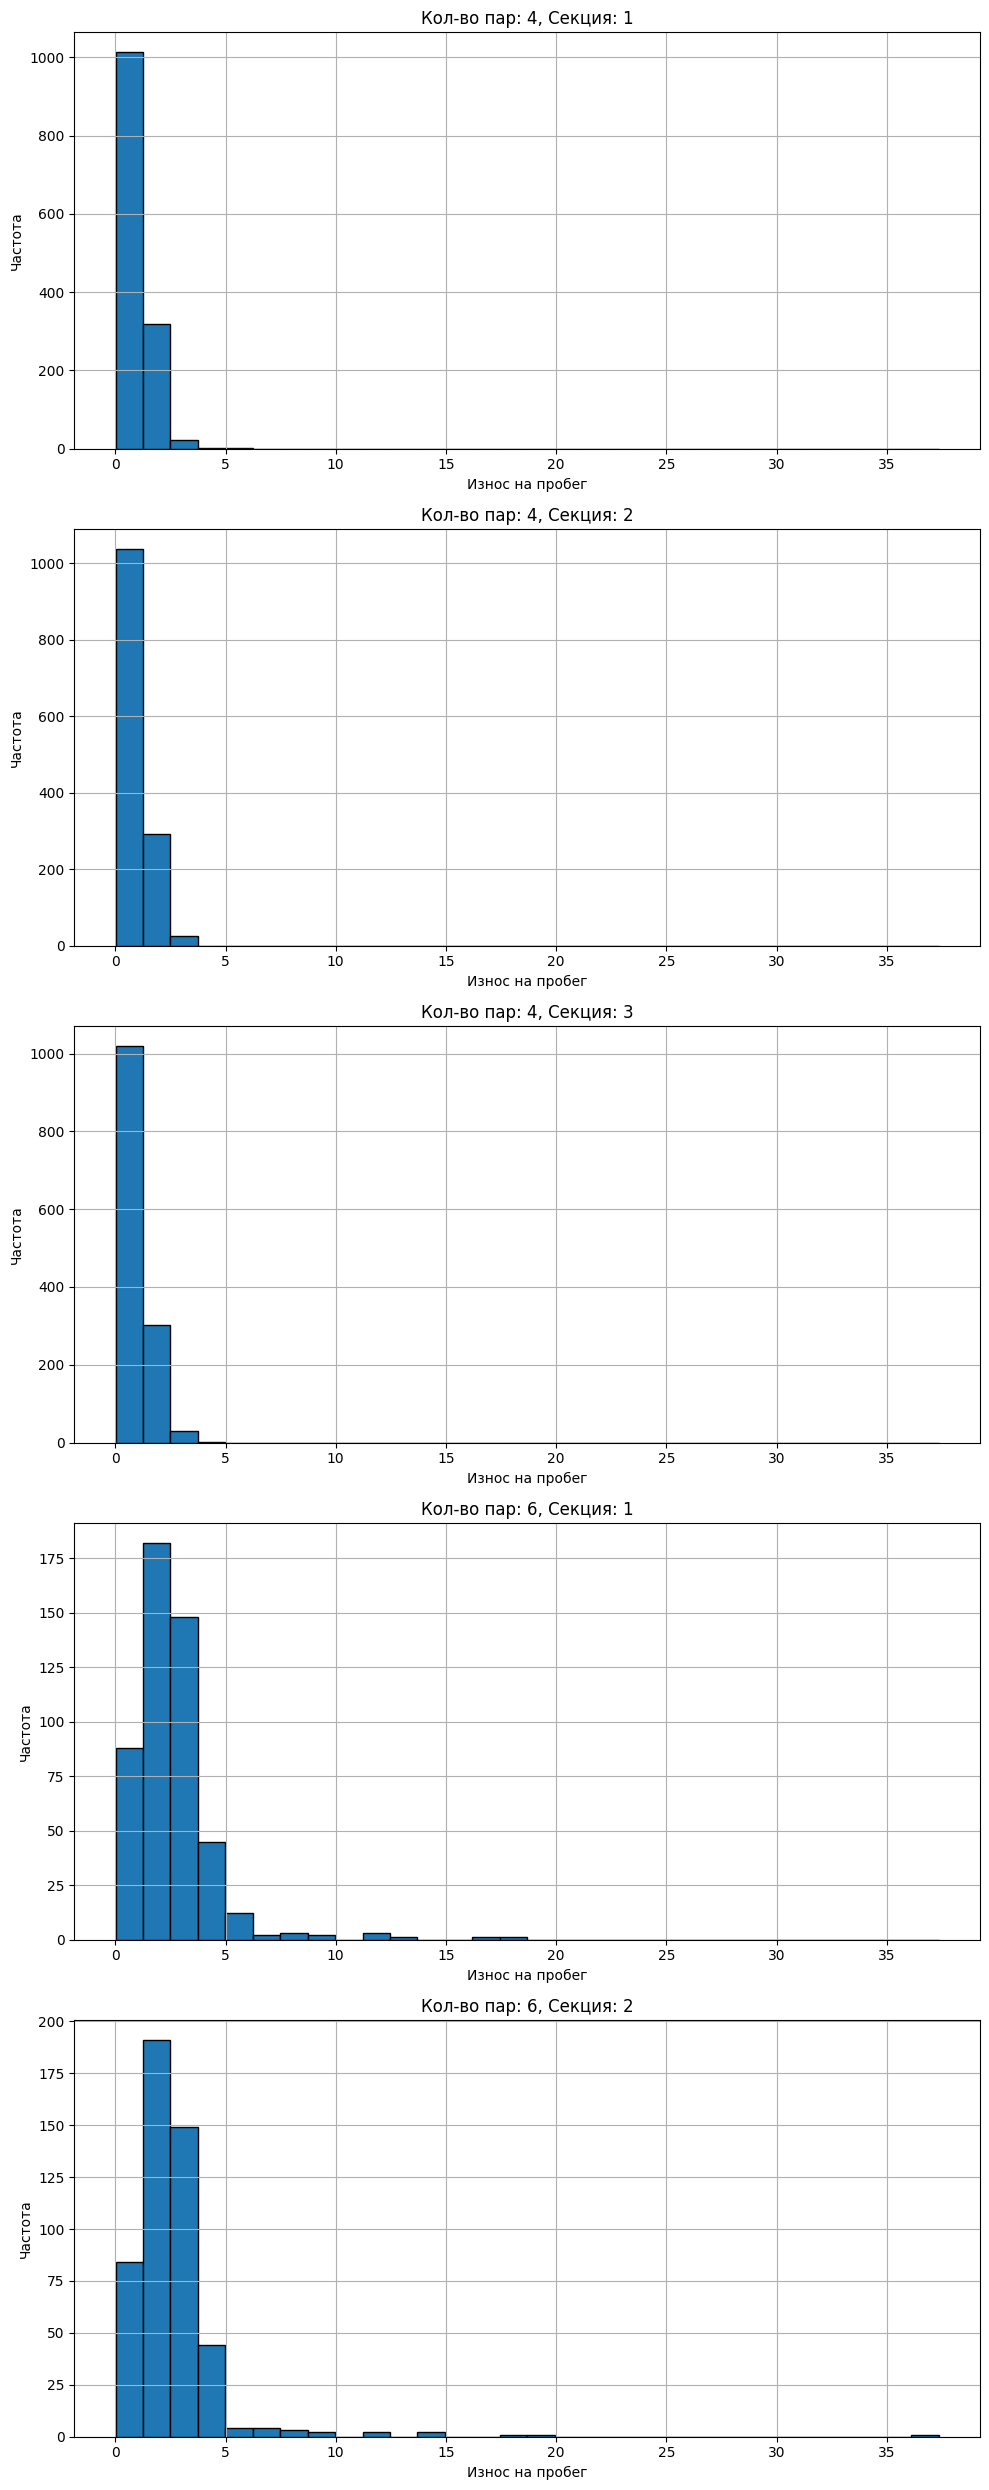

In [16]:
# Грузим
df = pd.read_csv(PATH+'Dataframe_02.csv')

# Группировка по "Кол-во пар" и "Секция"
grouped = df.groupby(['Кол-во пар', 'Секция'])['Износ на пробег']

# Определите глобальные границы оси x для всех гистограмм
global_xmin = df['Износ на пробег'].min()
global_xmax = df['Износ на пробег'].max()

# Постройте гистограммы для каждой группы
fig, axes = plt.subplots(nrows=len(grouped), figsize=(10, 5 * len(grouped)))

for (key, group), ax in zip(grouped, axes):
    group.hist(ax=ax, bins=30, edgecolor='black', range=(global_xmin, global_xmax))
    ax.set_title(f'Кол-во пар: {key[0]}, Секция: {key[1]}')
    ax.set_xlabel('Износ на пробег')
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

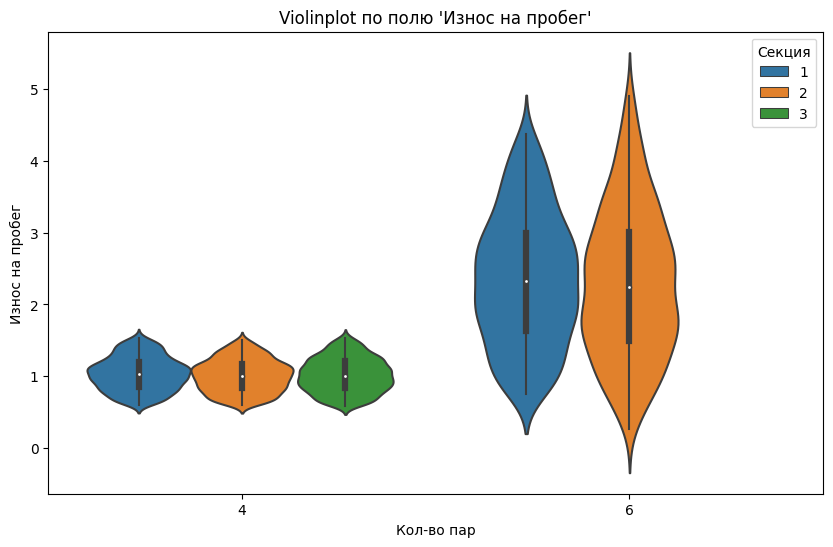

(4067, 73)


In [17]:
# Define a function to filter out outliers based on 3 sigma rule
def filter_outliers(group):
    factor = 1 #Жестко убираем выбросы
    mean = group.mean()
    std_dev = group.std()
    return group[(group >= mean - factor*std_dev) & (group <= mean + factor*std_dev)]

# Group by "Кол-во пар" and "Секция" and apply the filter function
filtered_df = df.groupby(['Кол-во пар', 'Секция'])['Износ на пробег'].transform(filter_outliers)

# Remove rows with NaN (these are the rows with outliers)
df_filtered = df[filtered_df.notna()]

# Compare the size of the original and filtered dataframe
original_size = df.shape[0]
filtered_size = df_filtered.shape[0]
original_size, filtered_size


plt.figure(figsize=(10, 6))
sns.violinplot(x='Кол-во пар', y='Износ на пробег', hue='Секция', data=df_filtered, split=False)
plt.title("Violinplot по полю 'Износ на пробег'")
plt.show()

df=df_filtered
df.to_csv(PATH+'Dataframe_03.csv', index=False)
print(df.shape)

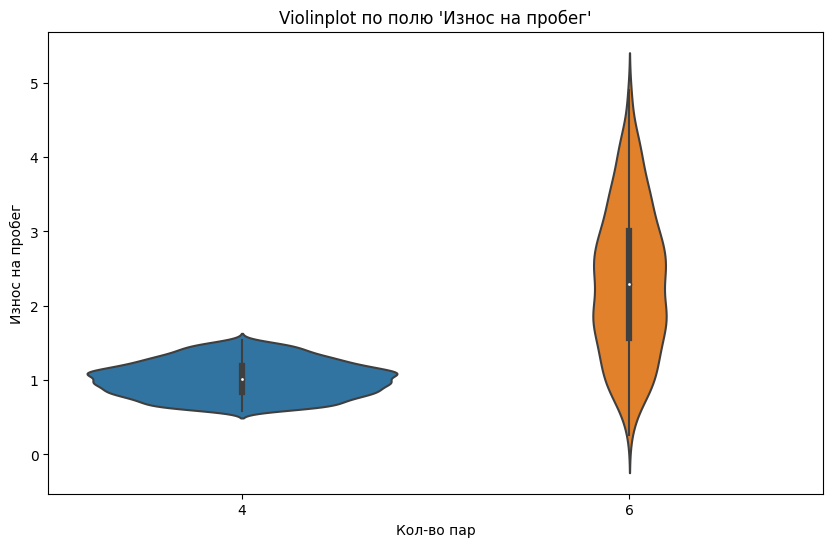

In [18]:
# От секции не зависит а от типа локомотива вполне

df = pd.read_csv(PATH+'Dataframe_03.csv')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Кол-во пар', y='Износ на пробег',  data=df, split=False)
plt.title("Violinplot по полю 'Износ на пробег'")
plt.show()

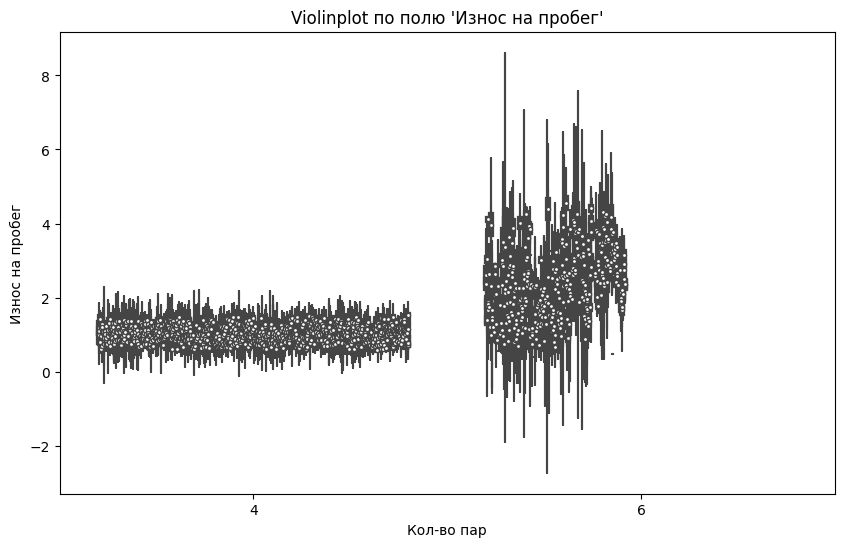

In [19]:
# Посмотрим зависимость от номерра локомотива

df = pd.read_csv(PATH+'Dataframe_03.csv')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Кол-во пар', y='Износ на пробег',  hue='Номер', data=df, split=False)
plt.title("Violinplot по полю 'Износ на пробег'")
plt.legend().set_visible(False)
plt.show()

In [20]:

# Уникальные значения из столбца "Кол-во пар"
unique_values = df['Кол-во пар'].unique()

# Проверяем, что у вас ровно два уникальных значения
if len(unique_values) != 2:
    print("В столбце 'Кол-во пар' больше или меньше двух уникальных значений!")
else:
    # Разделим датафрейм на две части
    df1 = df[df['Кол-во пар'] == unique_values[0]]
    df2 = df[df['Кол-во пар'] == unique_values[1]]

    # Смоторим размер каждой части
    print(f"Размер первой части для значения '{unique_values[0]}': {df1.shape[0]}")
    print(f"Размер второй части для значения '{unique_values[1]}': {df2.shape[0]}")

df1.to_csv(PATH+'Dataframe_1_01.csv', index=False)
df2.to_csv(PATH+'Dataframe_2_01.csv', index=False)

Размер первой части для значения '4': 3173
Размер второй части для значения '6': 894


Mean Squared Error: 0.29335559177090964
R-squared: -4.786955990425331
                            OLS Regression Results                            
Dep. Variable:        Износ на пробег   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.608
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.86e-07
Time:                        06:19:35   Log-Likelihood:                 134.93
No. Observations:                2538   AIC:                            -187.9
Df Residuals:                    2497   BIC:                             51.55
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

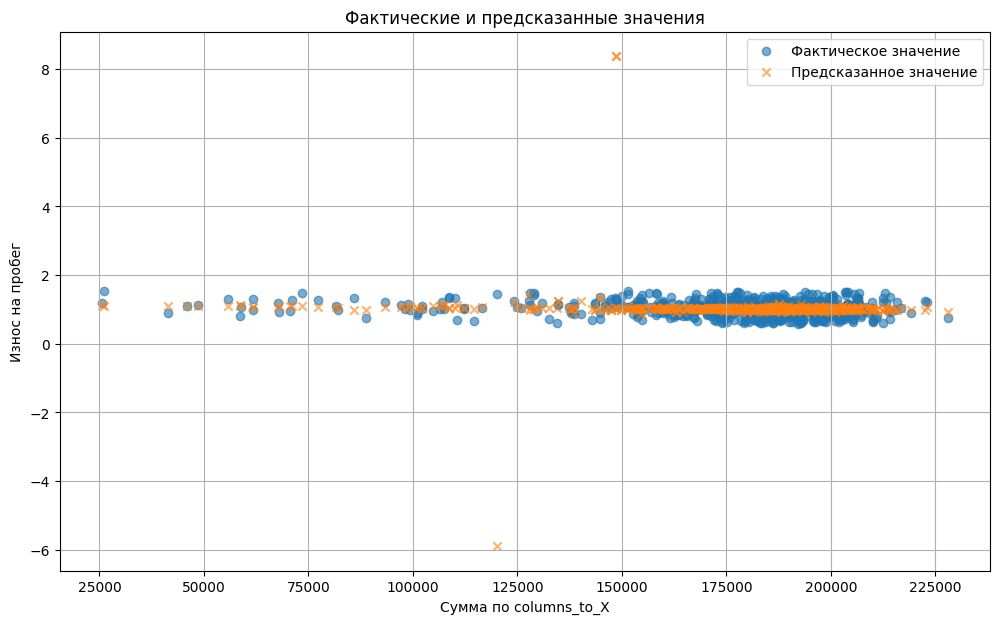

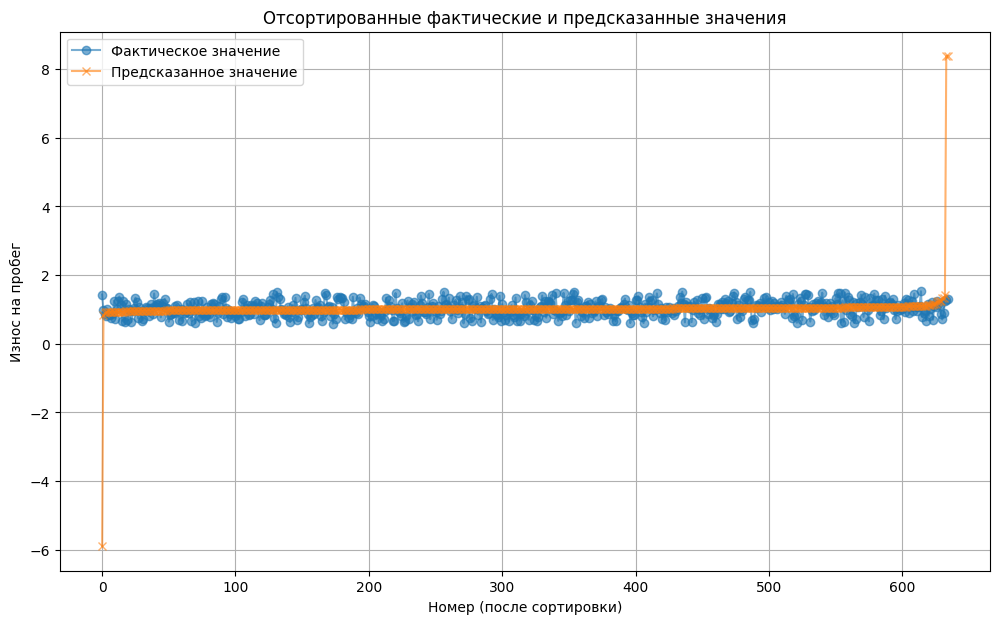

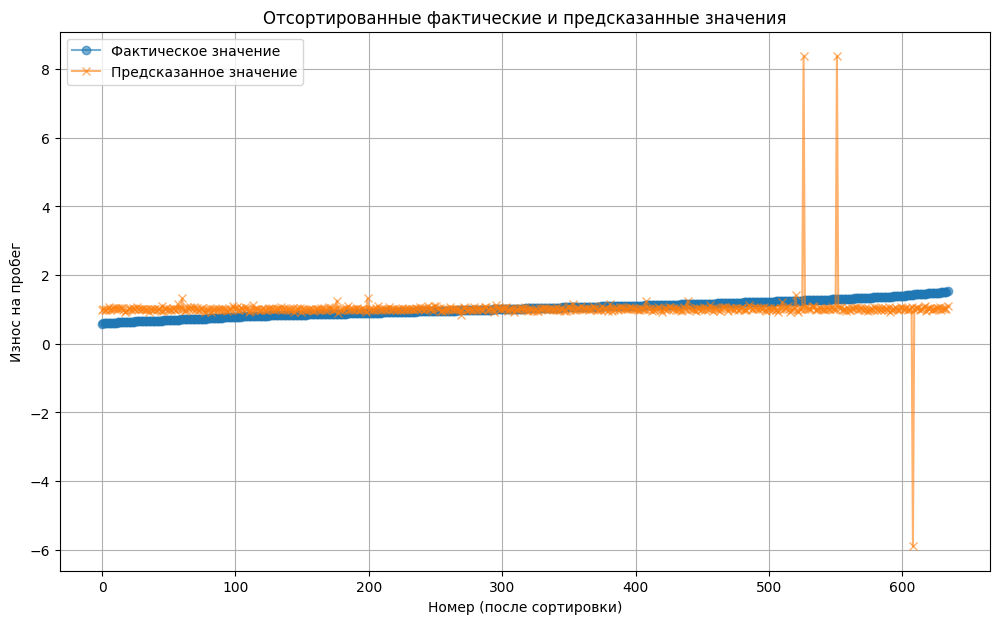

In [2]:
#@title  Statsmodels + Sklearn 1

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(PATH+'Dataframe_1_01.csv')

columns_to_X= [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

# Определение матрицы признаков X и зависимой переменной y
X = df[columns_to_X]
y = df["Износ на пробег"]

# Добавляем столбец единиц к матрице признаков для константы (intercept)
X = sm.add_constant(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель множественной линейной регрессии
model = sm.OLS(y_train, X_train)
results = model.fit()

# Предсказываем значения на тестовой выборке
y_pred = results.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Выводим коэффициенты регрессии и статистику модели
print(results.summary())

# Рассчитываем сумму по columns_to_X для тестовых данных
X_test_sum = X_test[columns_to_X].sum(axis=1)

# Построение графика
plt.figure(figsize=(12, 7))
plt.scatter(X_test_sum, y_test, label='Фактическое значение', alpha=0.6)
plt.scatter(X_test_sum, y_pred, label='Предсказанное значение', alpha=0.6, marker='x')
plt.xlabel('Сумма по columns_to_X')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Объединение фактических и предсказанных значений в один датафрейм
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Сортировка по предсказанным значениям
df_plot = df_plot.sort_values(by='Predicted')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Наоборот
df_plot = df_plot.sort_values(by='Actual')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

In [ ]:
#@title  Statsmodels + Sklearn Слишком большой разброс

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Dataframe_2_01.csv')

columns_to_X= [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

# Определение матрицы признаков X и зависимой переменной y
X = df[columns_to_X]
y = df["Износ на пробег"]

# Добавляем столбец единиц к матрице признаков для константы (intercept)
X = sm.add_constant(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель множественной линейной регрессии
model = sm.OLS(y_train, X_train)
results = model.fit()

# Предсказываем значения на тестовой выборке
y_pred = results.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Выводим коэффициенты регрессии и статистику модели
print(results.summary())

# Рассчитываем сумму по columns_to_X для тестовых данных
X_test_sum = X_test[columns_to_X].sum(axis=1)

# Построение графика
plt.figure(figsize=(12, 7))
plt.scatter(X_test_sum, y_test, label='Фактическое значение', alpha=0.6)
plt.scatter(X_test_sum, y_pred, label='Предсказанное значение', alpha=0.6, marker='x')
plt.xlabel('Сумма по columns_to_X')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Объединение фактических и предсказанных значений в один датафрейм
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Сортировка по предсказанным значениям
df_plot = df_plot.sort_values(by='Predicted')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()


# Наоборот
df_plot = df_plot.sort_values(by='Actual')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

In [ ]:
#@title Пробуем вручную ограничить коэффициенты


from scipy.optimize import minimize
import numpy as np

df = pd.read_csv(PATH+'Dataframe_1_01.csv')

columns_to_X= [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

# Определение матрицы признаков X и зависимой переменной y
X = df[columns_to_X]
y = df["Износ на пробег"]

# Добавляем столбец единиц к матрице признаков для константы (intercept)
#X = np.column_stack([np.ones(X.shape[0]), X])

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции потерь для линейной регрессии
def linear_regression_loss(coefficients, X, y):
    y_pred = X.dot(coefficients)
    residuals = y - y_pred
    return np.sum(residuals ** 2)

# Ограничения для коэффициентов
bounds = [(None, None)] + [(0.000000000001, 0.0001) for _ in range(X_train.shape[1] - 1)]

# Оптимизация
initial_guess = np.ones(X_train.shape[1])
result = minimize(linear_regression_loss, initial_guess, args=(X_train, y_train), bounds=bounds)

# Получение оптимизированных коэффициентов
optimized_coefficients = result.x

# Предсказываем значения на тестовой выборке
y_pred = X_test.dot(optimized_coefficients)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Optimized Coefficients: {optimized_coefficients}")


# Рассчитываем сумму по columns_to_X для тестовых данных
#X_test_sum = X_test[columns_to_X].sum(axis=1)

# Построение графика
plt.figure(figsize=(12, 7))
plt.scatter(X_test_sum, y_test, label='Фактическое значение', alpha=0.6)
plt.scatter(X_test_sum, y_pred, label='Предсказанное значение', alpha=0.6, marker='x')
plt.xlabel('Сумма по columns_to_X')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Объединение фактических и предсказанных значений в один датафрейм
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Сортировка по предсказанным значениям
df_plot = df_plot.sort_values(by='Predicted')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Наоборот
df_plot = df_plot.sort_values(by='Actual')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()



In [3]:
filtered_df[(filtered_df["Y try 01"] < 0)]

NameError: ignored

(3173, 75)
(3170, 75)


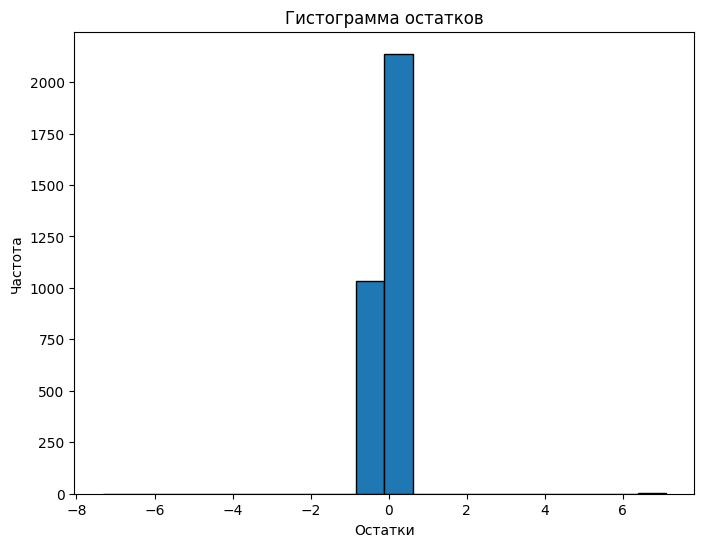

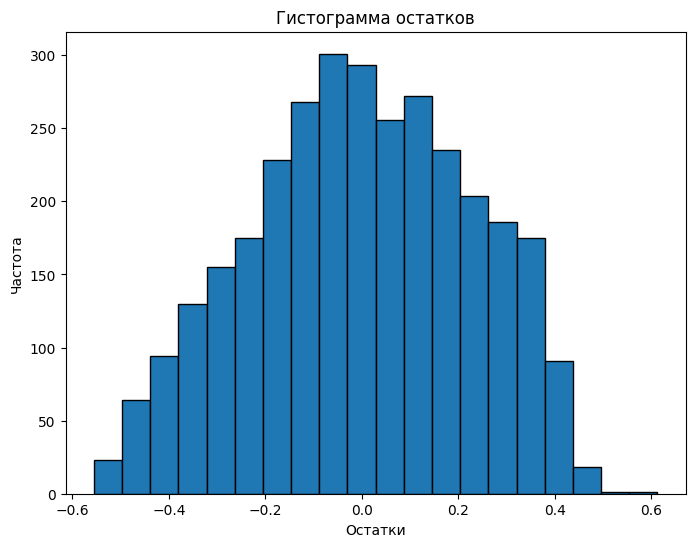

In [4]:
df["Y try 01"] = results.predict(X)

# Рассчитываем остатки
df["Остаток"] = df["Y try 01"]-df["Износ на пробег"]
# Создаем булеву маску, которая указывает, какие строки имеют остатки, не удовлетворяющие условию
mask = (df["Остаток"] >= -2) & (df["Остаток"] <= 2)
# Применяем маску к датасету, оставляя только строки с остатками в заданном диапазоне
filtered_df = df[mask]
# Теперь filtered_df содержит только строки с остатками в диапазоне от -2 до 2

print(df.shape)
print(filtered_df.shape)


plt.figure(figsize=(8, 6))
plt.hist(df["Остаток"], bins=20, edgecolor='k')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(filtered_df["Остаток"], bins=20, edgecolor='k')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.show()



In [7]:
df=filtered_df
df.to_csv(PATH+'Dataframe_filtred_01.csv', index=False)


df

,#тип,Номер,Секция,В-СИБ_1,В-СИБ_2,В-СИБ_3,В-СИБ_4,ГОРЬК_1,ГОРЬК_2,ГОРЬК_3,...,Ю-УР_3,Ю-УР_4,Кол-во пар,"Пробег, км","Износ, мм","Период, дн",Сумма пробега,Износ на пробег,Y try 01,Остаток
0,253,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,570284.0,22.80,1092.0,158327.0,1.440058,1.046709,-0.393348
1,253,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,489147.0,18.60,932.0,158327.0,1.174784,1.046709,-0.128075
2,253,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,460390.0,14.35,879.0,158327.0,0.906352,1.046709,0.140357
3,253,2,1,69503.0,10839.0,16698.0,9392.0,0.0,0.0,0.0,...,0.0,0.0,4,532528.0,13.20,1266.0,153470.0,0.860103,1.027486,0.167383
4,253,3,1,71335.0,11016.0,16882.0,9356.0,0.0,0.0,0.0,...,0.0,0.0,4,622412.0,18.35,1320.0,170811.0,1.074287,1.000279,-0.074008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,253,1387,2,1791.0,241.0,430.0,227.0,0.0,0.0,0.0,...,0.0,0.0,4,64128.0,3.25,120.0,25658.0,1.266661,1.117259,-0.149402
3169,253,1387,3,1791.0,241.0,430.0,227.0,0.0,0.0,0.0,...,0.0,0.0,4,64128.0,3.00,120.0,25658.0,1.169226,1.117259,-0.051967
3170,253,1388,1,3683.0,561.0,895.0,500.0,0.0,0.0,0.0,...,0.0,0.0,4,40780.0,1.75,80.0,25731.0,0.680113,1.106463,0.426350
3171,253,1388,2,3683.0,561.0,895.0,500.0,0.0,0.0,0.0,...,0.0,0.0,4,40780.0,2.00,80.0,25731.0,0.777273,1.106463,0.329191


In [ ]:
#@title  Суммируем по кривизне профиля (не получилось)

# Список столбцов, которые нужно суммировать
columns_to_sum = [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

# Создаем новые столбцы summ_1, summ_2, summ_3 и summ_4, суммируя соответствующие столбцы
df["summ_1"] = df[[col for col in columns_to_sum if col.endswith("_1")]].sum(axis=1)
df["summ_2"] = df[[col for col in columns_to_sum if col.endswith("_2")]].sum(axis=1)
df["summ_3"] = df[[col for col in columns_to_sum if col.endswith("_3")]].sum(axis=1)
df["summ_4"] = df[[col for col in columns_to_sum if col.endswith("_4")]].sum(axis=1)
df

In [ ]:
#@title Строим регрессию на суммированых данных.  (не получилось)

columns_to_X= ["summ_1","summ_2","summ_3","summ_4"]

# Определение матрицы признаков X и зависимой переменной y
X = df[columns_to_X]
y = df["Износ на пробег"]

# Добавляем столбец единиц к матрице признаков для константы (intercept)
X = sm.add_constant(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель множественной линейной регрессии
model = sm.OLS(y_train, X_train)
results = model.fit()

# Предсказываем значения на тестовой выборке
y_pred = results.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Выводим коэффициенты регрессии и статистику модели
print(results.summary())

# Рассчитываем сумму по columns_to_X для тестовых данных
X_test_sum = X_test[columns_to_X].sum(axis=1)

# Построение графика
plt.figure(figsize=(12, 7))
plt.scatter(X_test_sum, y_test, label='Фактическое значение', alpha=0.6)
plt.scatter(X_test_sum, y_pred, label='Предсказанное значение', alpha=0.6, marker='x')
plt.xlabel('Сумма по columns_to_X')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Объединение фактических и предсказанных значений в один датафрейм
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Сортировка по предсказанным значениям
df_plot = df_plot.sort_values(by='Predicted')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Наоборот
df_plot = df_plot.sort_values(by='Actual')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

Mean Squared Error: 0.07244653466210549
R-squared: -0.4279967055665075
                            OLS Regression Results                            
Dep. Variable:        Износ на пробег   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.475
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.26e-06
Time:                        06:31:41   Log-Likelihood:                 132.23
No. Observations:                2536   AIC:                            -184.5
Df Residuals:                    2496   BIC:                             49.07
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

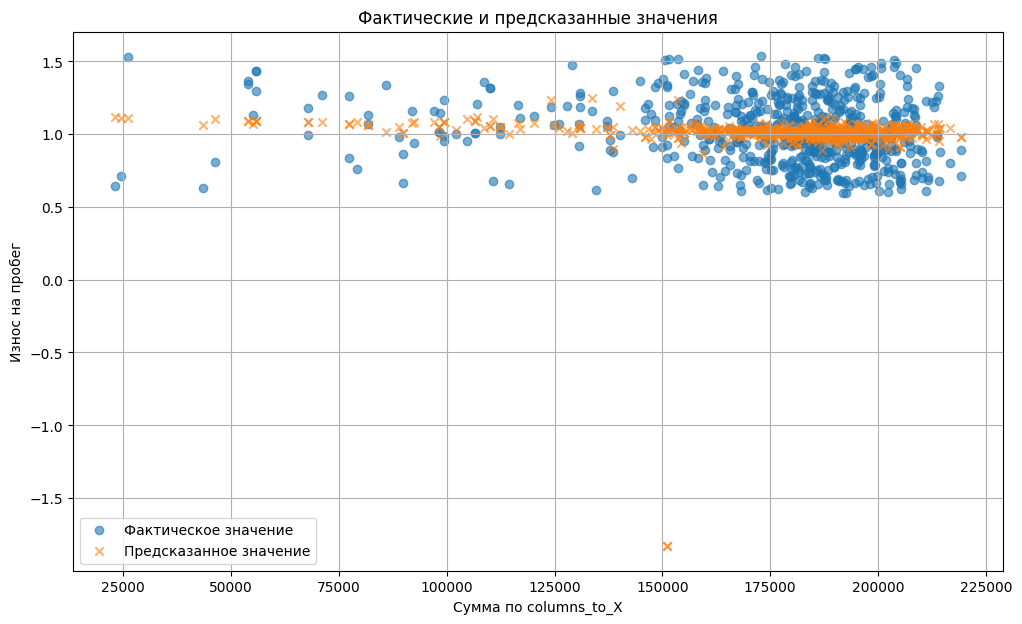

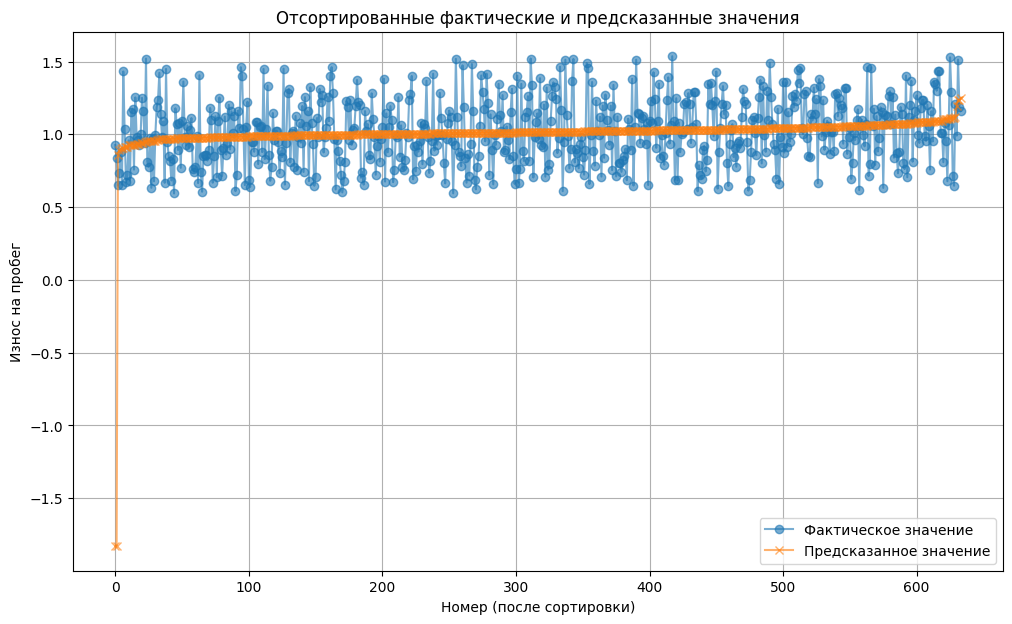

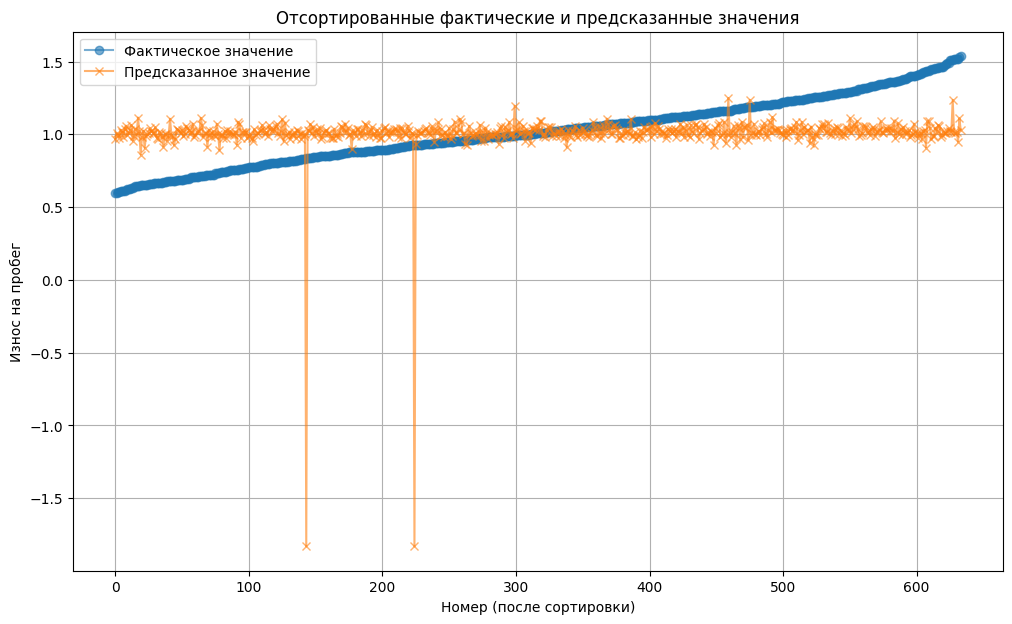

In [10]:
#@title  Строиим регрессию на отльтфильтрованных данных

df = pd.read_csv(PATH+'Dataframe_filtred_01.csv')


import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



columns_to_X= [
    "В-СИБ_1", "В-СИБ_2", "В-СИБ_3", "В-СИБ_4", "ГОРЬК_1", "ГОРЬК_2", "ГОРЬК_3", "ГОРЬК_4",
    "ДВОСТ_1", "ДВОСТ_2", "ДВОСТ_3", "ДВОСТ_4", "З-СИБ_1", "З-СИБ_2", "З-СИБ_3", "З-СИБ_4",
    "ЗАБ_1", "ЗАБ_2", "ЗАБ_3", "ЗАБ_4", "КБШ_1", "КБШ_2", "КБШ_3", "КБШ_4", "КЛНГ_1", "КЛНГ_2",
    "КЛНГ_3", "КЛНГ_4", "КРАС_1", "КРАС_2", "КРАС_3", "КРАС_4", "МОСК_1", "МОСК_2", "МОСК_3",
    "МОСК_4", "ОКТ_1", "ОКТ_2", "ОКТ_3", "ОКТ_4", "ПРИВ_1", "ПРИВ_2", "ПРИВ_3", "ПРИВ_4",
    "С-КАВ_1", "С-КАВ_2", "С-КАВ_3", "С-КАВ_4", "СВЕРД_1", "СВЕРД_2", "СВЕРД_3", "СВЕРД_4",
    "СЕВ_1", "СЕВ_2", "СЕВ_3", "СЕВ_4", "Ю-ВОСТ_1", "Ю-ВОСТ_2", "Ю-ВОСТ_3", "Ю-ВОСТ_4",
    "Ю-УР_1", "Ю-УР_2", "Ю-УР_3", "Ю-УР_4"
]

# Определение матрицы признаков X и зависимой переменной y
X = df[columns_to_X]
y = df["Износ на пробег"]

# Добавляем столбец единиц к матрице признаков для константы (intercept)
X = sm.add_constant(X)

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель множественной линейной регрессии
model = sm.OLS(y_train, X_train)
results = model.fit()

# Предсказываем значения на тестовой выборке
y_pred = results.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Выводим коэффициенты регрессии и статистику модели
print(results.summary())

# Рассчитываем сумму по columns_to_X для тестовых данных
X_test_sum = X_test[columns_to_X].sum(axis=1)

print(df.shape)


# Построение графика
plt.figure(figsize=(12, 7))
plt.scatter(X_test_sum, y_test, label='Фактическое значение', alpha=0.6)
plt.scatter(X_test_sum, y_pred, label='Предсказанное значение', alpha=0.6, marker='x')
plt.xlabel('Сумма по columns_to_X')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Объединение фактических и предсказанных значений в один датафрейм
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Сортировка по предсказанным значениям
df_plot = df_plot.sort_values(by='Predicted')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

# Наоборот
df_plot = df_plot.sort_values(by='Actual')

# Построение графика
plt.figure(figsize=(12, 7))
plt.plot(df_plot['Actual'].values, label='Фактическое значение', marker='o', alpha=0.6)
plt.plot(df_plot['Predicted'].values, label='Предсказанное значение', marker='x', alpha=0.6)
plt.xlabel('Номер (после сортировки)')
plt.ylabel('Износ на пробег')
plt.legend()
plt.title('Отсортированные фактические и предсказанные значения')
plt.grid(True)
plt.show()

In [11]:
df


,#тип,Номер,Секция,В-СИБ_1,В-СИБ_2,В-СИБ_3,В-СИБ_4,ГОРЬК_1,ГОРЬК_2,ГОРЬК_3,...,Ю-УР_3,Ю-УР_4,Кол-во пар,"Пробег, км","Износ, мм","Период, дн",Сумма пробега,Износ на пробег,Y try 01,Остаток
0,253,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,570284.0,22.80,1092.0,158327.0,1.440058,1.046709,-0.393348
1,253,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,489147.0,18.60,932.0,158327.0,1.174784,1.046709,-0.128075
2,253,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4,460390.0,14.35,879.0,158327.0,0.906352,1.046709,0.140357
3,253,2,1,69503.0,10839.0,16698.0,9392.0,0.0,0.0,0.0,...,0.0,0.0,4,532528.0,13.20,1266.0,153470.0,0.860103,1.027486,0.167383
4,253,3,1,71335.0,11016.0,16882.0,9356.0,0.0,0.0,0.0,...,0.0,0.0,4,622412.0,18.35,1320.0,170811.0,1.074287,1.000279,-0.074008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,253,1387,2,1791.0,241.0,430.0,227.0,0.0,0.0,0.0,...,0.0,0.0,4,64128.0,3.25,120.0,25658.0,1.266661,1.117259,-0.149402
3166,253,1387,3,1791.0,241.0,430.0,227.0,0.0,0.0,0.0,...,0.0,0.0,4,64128.0,3.00,120.0,25658.0,1.169226,1.117259,-0.051967
3167,253,1388,1,3683.0,561.0,895.0,500.0,0.0,0.0,0.0,...,0.0,0.0,4,40780.0,1.75,80.0,25731.0,0.680113,1.106463,0.426350
3168,253,1388,2,3683.0,561.0,895.0,500.0,0.0,0.0,0.0,...,0.0,0.0,4,40780.0,2.00,80.0,25731.0,0.777273,1.106463,0.329191


In [12]:
#@title  Нормализуем данные

df = pd.read_csv(PATH+'Dataframe_filtred_01.csv')

# Сохранение минимальных и максимальных значений для каждого столбца
df_min = df.min()
df_max = df.max()

# Нормализация данных
normalized_df = (df - df_min) / (df_max - df_min)

# Обратное преобразование к исходному масштабу
reverted_df = normalized_df * (df_max - df_min) + df_min

# Проверка, что reverted_df и df идентичны
print((reverted_df - df).sum().sum())  # Должно быть близко к нулю

df.to_csv(PATH+'Dataframe_filtred_01.csv', index=False)
df.to_csv(PATH+'Dataframe_filtred_01.csv', index=False)
df.to_csv(PATH+'Dataframe_filtred_01.csv', index=False)

3.0427552627021806e-10
